# Import data 

In [410]:
import pickle

with open('final_df.pkl', 'rb') as f:
    rug_df = pickle.load(f)

In [411]:
#because collection has many values (279) with few observations, we will bucket this data
rug_df.groupby('collection').collection.count().median()

21.0

In [412]:
col_count = rug_df['collection'].value_counts()
other_col = list(col_count[col_count < 50].index)
rug_df['collection'] = rug_df['collection'].replace(other_col,'other')

rug_df.collection.value_counts()

other                            4635
ultra vintage                     686
moroccan                          545
darya                             389
kazak                             325
balouch                           301
peshawar ziegler                  167
outdoor lattice                   138
mashad                            128
kashkuli gabbeh                   120
modern ziegler                    111
jill zarin outdoor rhony alum     109
timeless                          100
cowhide                            98
solid shag                         95
nepal                              94
lattice frieze                     91
ariana ziegler                     87
lattice shag                       87
monte carlo                        84
kashan                             82
kilim modern                       75
outdoor modern                     75
moroccan trellis                   74
outdoor coastal                    74
santiago                           72
oushak      

In [413]:
import pandas as pd
pd.set_option("display.max_rows", None, "display.max_columns", None)
rug_df.head()

collection  sale_price  orig_price cntry_made_in   area      shape  color  \
0   angelica        29.0        58.0        turkey   6.51  rectangle   gray   
1      other        99.0       198.0        turkey  40.00  rectangle  brown   
2      other        89.0       178.0        turkey  16.00     runner  brown   
3      other       109.0       218.0        turkey  12.00     runner   pink   
4     oregon       189.0       378.0        turkey  78.30  rectangle  brown   

  hand_made  pile_height  indoor_outdoor                       url  \
0        no        0.500             0.0  https://rugs.com/6265714   
1        no        0.500             0.0  https://rugs.com/6275866   
2        no        0.334             0.0  https://rugs.com/6339912   
3        no        0.500             0.0  https://rugs.com/6331612   
4        no        0.334             0.0  https://rugs.com/6294910   

   construction  polypropylene  polyester  cotton  wool  jute  chenille  \
0           0.0          100.0        0.0     0.0   0.0   0.0       0.0   
1           0.0          100.0        0.0     0.0   0.0   0.0       0.0   
2           0.0          100.0        0.0     0.0   0.0   0.0       0.0   
3           0.0            0.0      100.0     0.0   0.0   0.0       0.0   
4           0.0           85.0       15.0     0.0   0.0   0.0       0.0   

   bamboo  silk  leather  zakard  acrylic  kork  
0     0.0   0.0      0.0     0.0      0.0   0.0  
1     0.0   0.0      0.0     0.0      0.0   0.0  
2     0.0   0.0      0.0     0.0      0.0   0.0  
3     0.0   0.0      0.0     0.0      0.0   0.0  
4     0.0   0.0      0.0     0.0      0.0   0.0

In [414]:
df = rug_df.copy()

In [415]:
df.drop(columns = ['hand_made','url'],inplace=True)
df = df.reindex(columns=['sale_price','orig_price','collection','cntry_made_in','construction','pile_height',
                         'shape','area','color','indoor_outdoor','polypropylene','polyester','cotton','wool',
                        'jute','chenille','bamboo','silk','leather','zakard','acrylic','kork'])

In [416]:
df.head()

sale_price  orig_price collection cntry_made_in  construction  pile_height  \
0        29.0        58.0   angelica        turkey           0.0        0.500   
1        99.0       198.0      other        turkey           0.0        0.500   
2        89.0       178.0      other        turkey           0.0        0.334   
3       109.0       218.0      other        turkey           0.0        0.500   
4       189.0       378.0     oregon        turkey           0.0        0.334   

       shape   area  color  indoor_outdoor  polypropylene  polyester  cotton  \
0  rectangle   6.51   gray             0.0          100.0        0.0     0.0   
1  rectangle  40.00  brown             0.0          100.0        0.0     0.0   
2     runner  16.00  brown             0.0          100.0        0.0     0.0   
3     runner  12.00   pink             0.0            0.0      100.0     0.0   
4  rectangle  78.30  brown             0.0           85.0       15.0     0.0   

   wool  jute  chenille  bamboo  silk  leather  zakard  acrylic  kork  
0   0.0   0.0       0.0     0.0   0.0      0.0     0.0      0.0   0.0  
1   0.0   0.0       0.0     0.0   0.0      0.0     0.0      0.0   0.0  
2   0.0   0.0       0.0     0.0   0.0      0.0     0.0      0.0   0.0  
3   0.0   0.0       0.0     0.0   0.0      0.0     0.0      0.0   0.0  
4   0.0   0.0       0.0     0.0   0.0      0.0     0.0      0.0   0.0

# Preprocessing

In [417]:
#https://datagy.io/sklearn-one-hot-encode/
#https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html#sphx-glr-auto-examples-compose-plot-column-transformer-mixed-types-py

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
import pandas as pd


In [418]:
rug_df = pd.get_dummies(df, columns=['shape','color'],drop_first = True)

In [419]:
rug_df = pd.get_dummies(df, columns=['cntry_made_in'],drop_first = True)

In [420]:
rug_df = pd.get_dummies(df, columns=['collection'],drop_first = True)

In [421]:
rug_df.drop(columns=['cntry_made_in','shape','color'],inplace=True)

In [422]:
rug_df.describe()

sale_price     orig_price  construction  pile_height         area  \
count   9778.000000    9778.000000   9778.000000  9778.000000  9778.000000   
mean     762.503170    2388.919002      0.448047     0.465831    51.407280   
std     1665.909662    6205.247265      0.497319     0.266713    37.663167   
min       14.000000      38.000000      0.000000     0.167000     1.920000   
25%       99.000000     198.000000      0.000000     0.300000    23.070000   
50%      269.000000     538.000000      0.000000     0.500000    40.805000   
75%      799.000000    2629.000000      1.000000     0.500000    70.710000   
max    39380.000000  294997.000000      1.000000     2.000000   356.940000   

       indoor_outdoor  polypropylene    polyester       cotton         wool  \
count     9778.000000    9778.000000  9778.000000  9778.000000  9778.000000   
mean         0.092248      45.170280     7.393127     1.393434    40.458171   
std          0.289390      48.757909    23.553153    10.982889    48.801476   
min          0.000000       0.000000     0.000000     0.000000     0.000000   
25%          0.000000       0.000000     0.000000     0.000000     0.000000   
50%          0.000000       0.000000     0.000000     0.000000     0.000000   
75%          0.000000     100.000000     0.000000     0.000000   100.000000   
max          1.000000     100.000000   100.000000   100.000000   100.000000   

              jute     chenille       bamboo         silk      leather  \
count  9778.000000  9778.000000  9778.000000  9778.000000  9778.000000   
mean      0.856515     2.335345     0.209654     0.685212     0.567601   
std       8.788491    13.823199     4.374209     6.711589     5.297239   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max     100.000000   100.000000   100.000000   100.000000    50.000000   

            zakard      acrylic         kork  collection_ariana ziegler  \
count  9778.000000  9778.000000  9778.000000                9778.000000   
mean      0.567601     0.245449     0.117611                   0.008898   
std       5.297239     4.948450     2.902471                   0.093911   
min       0.000000     0.000000     0.000000                   0.000000   
25%       0.000000     0.000000     0.000000                   0.000000   
50%       0.000000     0.000000     0.000000                   0.000000   
75%       0.000000     0.000000     0.000000                   0.000000   
max      50.000000   100.000000   100.000000                   1.000000   

       collection_balouch  collection_braided jute  collection_cowhide  \
count         9778.000000              9778.000000         9778.000000   
mean             0.030783                 0.006443            0.010022   
std              0.172739                 0.080014            0.099615   
min              0.000000                 0.000000            0.000000   
25%              0.000000                 0.000000            0.000000   
50%              0.000000                 0.000000            0.000000   
75%              0.000000                 0.000000            0.000000   
max              1.000000                 1.000000            1.000000   

       collection_darya  collection_farahan  collection_hossainabad  \
count       9778.000000         9778.000000             9778.000000   
mean           0.039783            0.006443                0.006341   
std            0.195459            0.080014                0.079380   
min            0.000000            0.000000                0.000000   
25%            0.000000            0.000000                0.000000   
50%            0.000000            0.000000                0.000000   
75%            0.000000            0.000000                0.000000   
max            1

# Additional EDA

Look at key statistics and visualizations related to regression assumptions -- correlation matrix, target distribution, target vs. feature plots (e.g. seaborn pair plot). Get some initial expectations for model performance and identify features that intuitively, visually, and based on correlation with the target are likely to work well.

<AxesSubplot:>

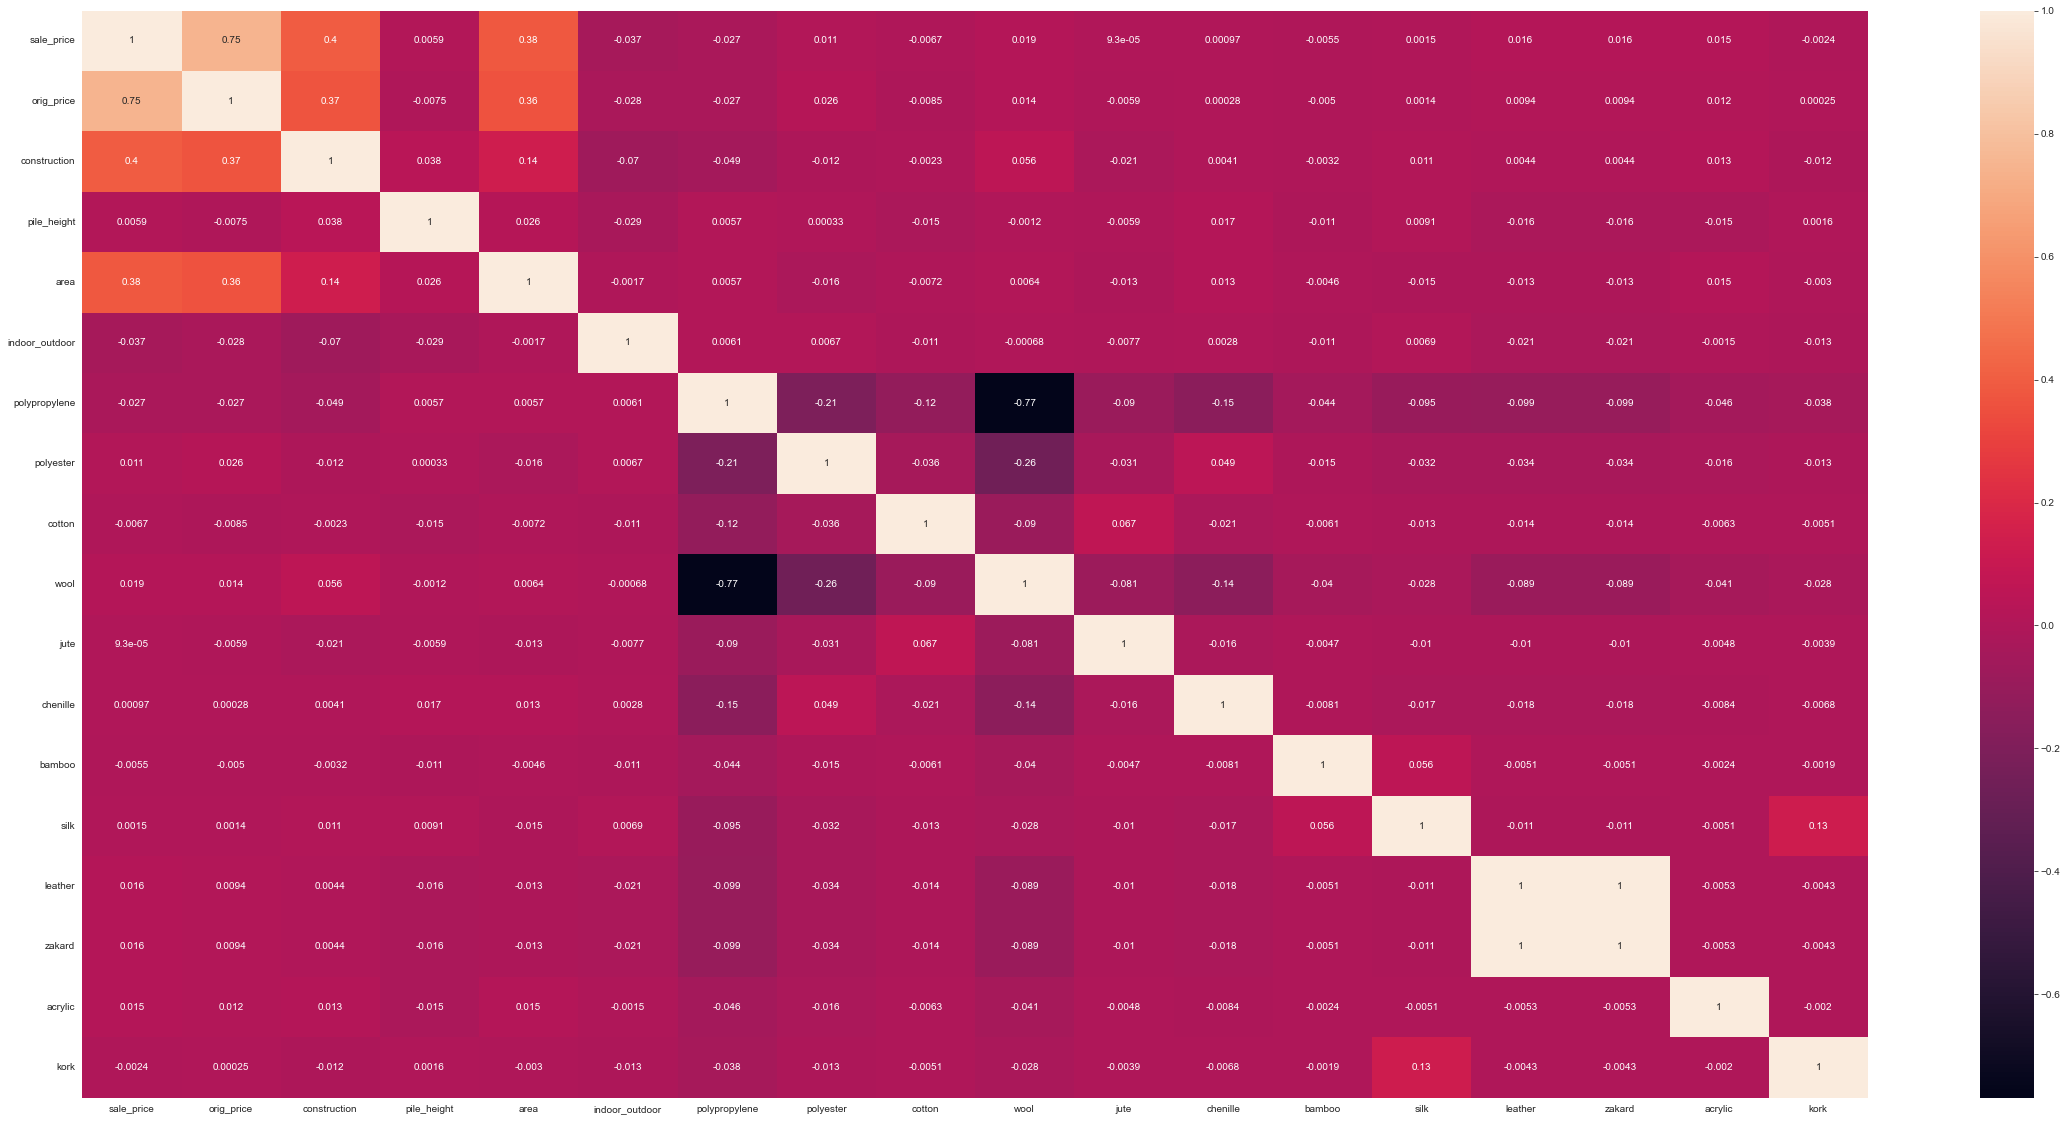

In [423]:
import matplotlib.pyplot as plt
import seaborn as sns

corrs = df.corr()
fig, ax = plt.subplots(figsize=(40,20))
sns.heatmap(corrs, cmap="rocket",annot=True, ax=ax)

# Split the data

In [424]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

X = rug_df.drop(columns=['sale_price'])
y = rug_df['sale_price']

X, X_test, y, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)


Text(0.5, 0, 'Sale Price')

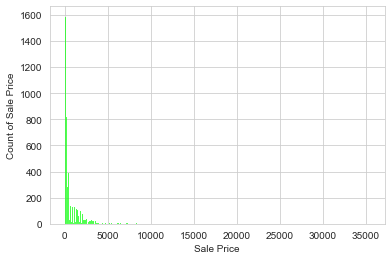

In [425]:
X['sale_price'] = y
sns.set_style("whitegrid")
sns.histplot(X['sale_price'], color="lime")
plt.ylabel('Count of Sale Price')
plt.xlabel('Sale Price')

Text(0.5, 0, 'Sale Price')

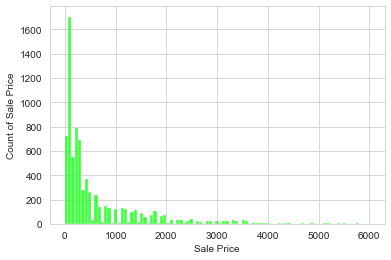

In [426]:
X['sale_price'] = y
sns.set_style("whitegrid")
sns.histplot(X['sale_price'],binrange=(0,6000), color="lime")
plt.ylabel('Count of Sale Price')
plt.xlabel('Sale Price')

In [427]:
rug_df['sale_price'].mean()

762.5031703824914

{'whiskers': [<matplotlib.lines.Line2D at 0x173fa0e80>,
 'caps': [<matplotlib.lines.Line2D at 0x173fae5e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x173fa0af0>],
 'medians': [<matplotlib.lines.Line2D at 0x173faed00>],
 'fliers': [<matplotlib.lines.Line2D at 0x173fba0d0>],
 'means': []}

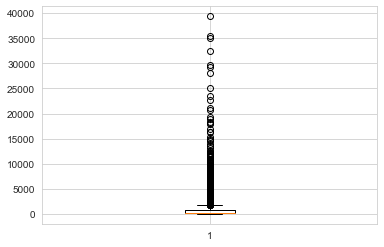

In [428]:

plt.boxplot(rug_df['sale_price'])


In [429]:
rug_df = rug_df[rug_df['sale_price']<=3000]

In [430]:
with open('dummy_variable_df.pkl', 'wb') as f:
    pickle.dump(rug_df,f)

In [431]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

X = rug_df.drop(columns=['sale_price'])
y = rug_df['sale_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                       test_size=.2,     
                                       random_state=42)
lm = LinearRegression() 

kf = KFold(n_splits=5, # number of folds
     shuffle=True, # randomizes order of rows before split
     random_state = 42) # using same number in future code/ rerunning allows us to replicate the split 

#to see all validation scores
lm_cv = cross_val_score(lm, X_train, y_train, # estimator, features, target
     cv= kf, # folds created above; could also just use a number 
     scoring='r2') # scoring metric
print(lm_cv)

# to print the mean score with standard deviation, rounded to 2 decimals
print(np.round(np.mean(lm_cv), 2), "+-", np.round(np.std(lm_cv),2))

[0.85189752 0.85189567 0.86727144 0.84285993 0.8335609 ]
0.85 +- 0.01


In [432]:
lr = LinearRegression()
X = X_train
y = y_train
lr.fit(X, y)
lr.score(X,y)

0.8516618639255865

In [433]:
y_actual_train = y
y_predicted_train = lr.predict(X)

In [434]:
# Check the metrics on the train data
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
print('R^2:', lr.score(X,y))
print('RMSE:', sqrt(mean_squared_error(y_actual_train, y_predicted_train)))
print('MSE:', mean_absolute_error(y_actual_train, y_predicted_train))

R^2: 0.8516618639255865
RMSE: 238.7379637310733
MSE: 127.97789835244693


In [435]:
lr = LinearRegression()
X = X_test
y = y_test
lr.fit(X, y)
lr.score(X,y)
y_actual_test = y
y_predicted_test = lr.predict(X)
print('R^2:', lr.score(X,y))
print('RMSE:', sqrt(mean_squared_error(y_actual_test, y_predicted_test)))
print('MSE:', mean_absolute_error(y_actual_test, y_predicted_test))

R^2: 0.839964585810739
RMSE: 251.09783772817403
MSE: 132.29850338388272


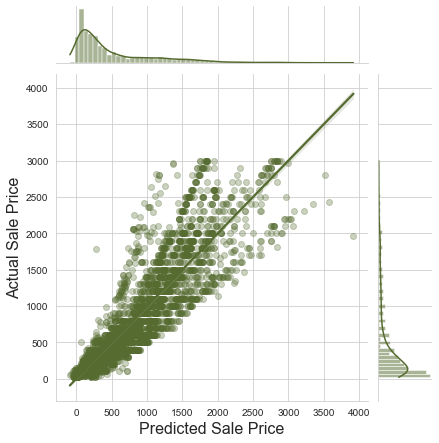

In [442]:
joint_polot = sns.jointplot(x = y_predicted_train,y = y_actual_train , kind='reg',joint_kws = {'scatter_kws':dict(alpha=0.3)}, color='darkolivegreen')
joint_polot.set_axis_labels('Predicted Sale Price', 'Actual Sale Price', fontsize=16)

<AxesSubplot:ylabel='sale_price'>

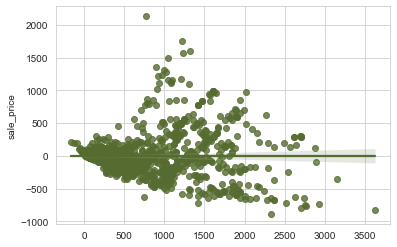

In [440]:
Residual = y_actual_test - y_predicted_test

sns.regplot(x= y_predicted_test, y= Residual,color='darkolivegreen')

We're seeing some heteroskedasticity indicating the assumption of Equal Variance of errors is violated and we should try transforming the target variable. Can try these transformations: log, square root, box cox or weighted least squares regression. Start with log. 

# Linear Regression transform target variable

In [457]:
# Samantha Knee Jan 19, 2021 https://medium.com/swlh/log-transformations-in-linear-regression-the-basics-95bc79c1ad35

X = rug_df.drop(columns=['sale_price'])
y = rug_df['sale_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                       test_size=.2,     
                                       random_state=42)

outcome = y_train
predictor = X_train
model = sm.OLS(outcome,predictor, data=rug_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sale_price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     1049.
Date:                Tue, 14 Jun 2022   Prob (F-statistic):               0.00
Time:                        16:14:15   Log-Likelihood:                -50417.
No. Observations:                7465   AIC:                         1.009e+05
Df Residuals:                    7408   BIC:                         1.013e+05
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
orig_price                                   0.1274      0.002     74.191      0.000       0.124       0.131
construction                              -105.6942     11.957     -8.839      0.000    -129.134     -82.255
pile_height                                -34.0002     13.274     -2.561      0.010     -60.021      -7.979
area                                        -1.0555      0.118     -8.940      0.000      -1.287      -0.824
indoor_outdoor                              -7.2409      8.341     -0.868      0.385     -23.592       9.110
polypropylene                              -11.4020      0.389    -29.316      0.000     -12.164     -10.640
polyester                                  -11.4775      0.400    -28.682      0.000     -12.262     -10.693
cotton                                     -11.5997      0.449    -25.858      0.000     -12.479     -10.720
wool                                       -11.3768      0.388    -29.305      0.000     -12.138     -10.616
jute                                       -11.3104      0.472    -23.962      0.000     -12.236     -10.385
chenille                                   -11.2723      0.426    -26.473      0.000     -12.107     -10.438
bamboo                                     -11.7711      0.657    -17.911      0.000     -13.059     -10.483
silk                                       -10.9842      0.521    -21.099      0.000     -12.005      -9.964
leather                                    -11.5704      0.449    -25.748      0.000     -12.451     -10.690
zakard                                     -11.5704      0.449    -25.748      0.000     -12.451     -10.690
acrylic                                    -10.8871      0.615    -17.691      0.000     -12.093      -9.681
kork                                       -11.2444      0.857    -13.123      0.000     -12.924      -9.565
collection_ariana ziegler                   23.4511     44.260      0.530      0.596     -63.312     110.214
collection_balouch                         -95.7922     34.992     -2.738      0.006    -164.386     -27.199
collection_braided jute                     12.2792     42.693      0.288      0.774     -71.412      95.970
collection_cowhide                         -47.4663     40.605     -1.169      0.242    -127.063      32.130
collection_darya                           242.2950     35.073      6.908      0.000     173.542     311.048
collection_farahan                        -360.2430     44.098     -8.169      0.000    -446.687    -273.799
collection_hossainabad                    -296.4821     44.030     -6.734      0.000    -382.793    -210.171
collection_hyacinth                        -78.4261     41.704     -1.881      0.060    -160.179       3.326
collection_jill zarin outdoor r

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


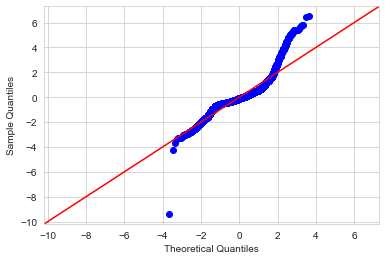

In [458]:
fig = sm.graphics.qqplot(model.resid,line = '45', fit=True)

In [464]:
rug_df = rug_df[rug_df['sale_price']<= 1000]

In [465]:
import numpy as np
rug_df['sale_price_log'] = np.log(rug_df['sale_price'])

X = rug_df.drop(columns=['sale_price'])
y = rug_df['sale_price_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                       test_size=.2,     
                                       random_state=42)

rug_df['sale_price_log'] = np.log(rug_df['sale_price'])
outcome = y_train
predictor = X_train
model = sm.OLS(outcome,predictor, data=rug_df).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         sale_price_log   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.378e+27
Date:                Tue, 14 Jun 2022   Prob (F-statistic):               0.00
Time:                        16:17:52   Log-Likelihood:             1.7132e+05
No. Observations:                6207   AIC:                        -3.425e+05
Df Residuals:                    6150   BIC:                        -3.421e+05
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
orig_price                                2.003e-16   6.21e-18     32.259      0.000    1.88e-16    2.12e-16
construction                              5.551e-16   1.55e-14      0.036      0.972   -2.99e-14     3.1e-14
pile_height                               1.737e-14   1.65e-14      1.052      0.293    -1.5e-14    4.97e-14
area                                      -4.15e-16   1.62e-16     -2.569      0.010   -7.32e-16   -9.83e-17
indoor_outdoor                            2.082e-16   1.06e-14      0.020      0.984   -2.06e-14     2.1e-14
polypropylene                             4.944e-17   5.22e-16      0.095      0.925   -9.75e-16    1.07e-15
polyester                                 8.327e-17   5.37e-16      0.155      0.877   -9.69e-16    1.14e-15
cotton                                    2.368e-16   5.89e-16      0.402      0.688   -9.18e-16    1.39e-15
wool                                     -6.375e-17   5.22e-16     -0.122      0.903   -1.09e-15    9.59e-16
jute                                      2.966e-16   6.27e-16      0.473      0.636   -9.33e-16    1.53e-15
chenille                                 -5.252e-16   5.66e-16     -0.928      0.354   -1.63e-15    5.85e-16
bamboo                                    8.587e-17   9.09e-16      0.094      0.925    -1.7e-15    1.87e-15
silk                                      5.378e-17   7.18e-16      0.075      0.940   -1.35e-15    1.46e-15
leather                                   1.843e-15   5.94e-16      3.103      0.002    6.79e-16    3.01e-15
zakard                                   -1.794e-15   5.94e-16     -3.019      0.003   -2.96e-15   -6.29e-16
acrylic                                   1.331e-16   9.16e-16      0.145      0.884   -1.66e-15    1.93e-15
kork                                      2.429e-17   1.37e-15      0.018      0.986   -2.66e-15    2.71e-15
collection_ariana ziegler                 7.772e-16   7.84e-14      0.010      0.992   -1.53e-13    1.55e-13
collection_balouch                       -4.441e-15   4.47e-14     -0.099      0.921   -9.21e-14    8.32e-14
collection_braided jute                  -1.443e-15   5.43e-14     -0.027      0.979   -1.08e-13    1.05e-13
collection_cowhide                        -2.22e-15   4.99e-14     -0.044      0.965      -1e-13    9.56e-14
collection_darya                         -7.772e-16   4.89e-14     -0.016      0.987   -9.67e-14    9.52e-14
collection_farahan                        2.665e-15      7e-14      0.038      0.970   -1.35e-13     1.4e-13
collection_hossainabad                   -6.661e-16   5.63e-14     -0.012      0.991   -1.11e-13     1.1e-13
collection_hyacinth                      -6.661e-16   5.32e-14     -0.013      0.990   -1.05e-13    1.04e-13
collection_jill zarin outdoor r

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


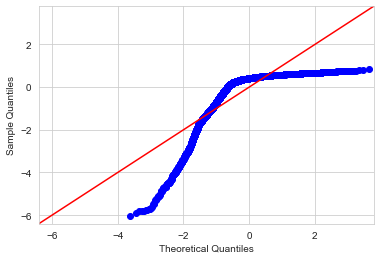

In [463]:
fig = sm.graphics.qqplot(model.resid,line = '45', fit=True)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Lambda value used for Transformation: 0.003012177346609106


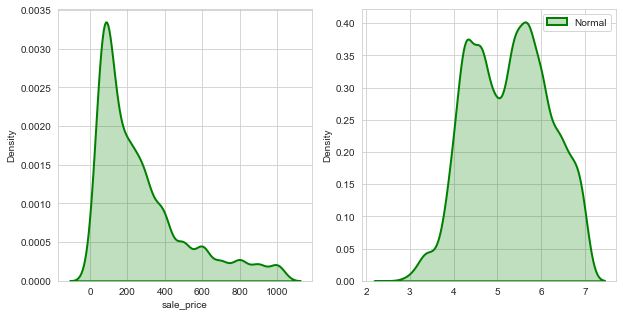

In [470]:
# nishkarsh146 May 13, 2022 https://www.geeksforgeeks.org/box-cox-transformation-using-python/

import numpy as np
from scipy import stats
 
# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

X = rug_df.drop(columns=['sale_price'])
y = rug_df['sale_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                       test_size=.2,     
                                       random_state=42)
 
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(y_train)
 
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(y_train, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda}")

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


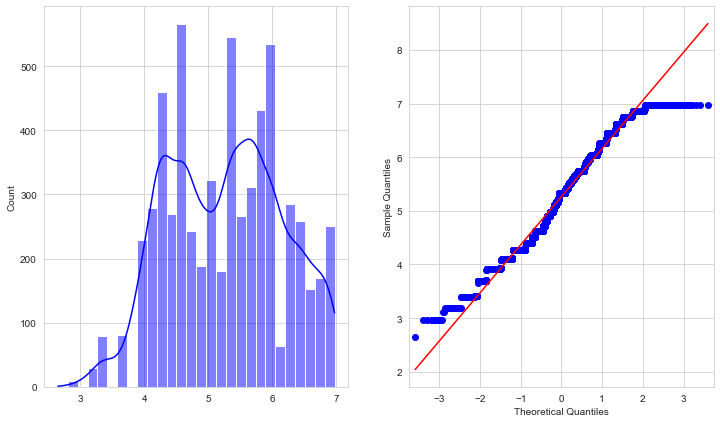

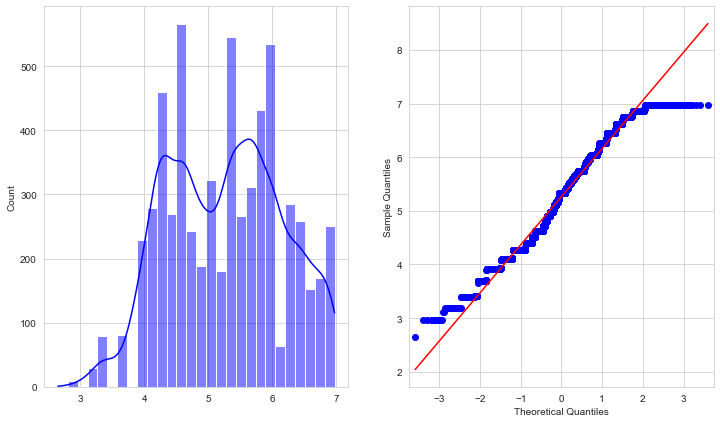

In [472]:
#check the transformed data for normality using a probability plot
#https://www.geeksforgeeks.org/normal-probability-plot/

import scipy.stats as sc
import statsmodels.graphics.gofplots as sm

# plots for standard distribution
fig, ax = plt.subplots(1, 2, figsize=(12, 7))
sns.histplot(fitted_data,kde=True, color ='blue',ax=ax[0])
sm.ProbPlot(fitted_data).qqplot(line='s', ax=ax[1])

In [480]:
#that's highly unlikely, modeling a model by accident?
Linreg1 = LinearRegression()
Linreg1_1 = Linreg1.fit(X_train,y_train)
Linreg1_1.score(X_test,y_test)

1.0

In [485]:
df.head()

sale_price  orig_price collection cntry_made_in  construction  pile_height  \
0        29.0        58.0   angelica        turkey           0.0        0.500   
1        99.0       198.0      other        turkey           0.0        0.500   
2        89.0       178.0      other        turkey           0.0        0.334   
3       109.0       218.0      other        turkey           0.0        0.500   
4       189.0       378.0     oregon        turkey           0.0        0.334   

       shape   area  color  indoor_outdoor  polypropylene  polyester  cotton  \
0  rectangle   6.51   gray             0.0          100.0        0.0     0.0   
1  rectangle  40.00  brown             0.0          100.0        0.0     0.0   
2     runner  16.00  brown             0.0          100.0        0.0     0.0   
3     runner  12.00   pink             0.0            0.0      100.0     0.0   
4  rectangle  78.30  brown             0.0           85.0       15.0     0.0   

   wool  jute  chenille  bamboo  silk  leather  zakard  acrylic  kork  
0   0.0   0.0       0.0     0.0   0.0      0.0     0.0      0.0   0.0  
1   0.0   0.0       0.0     0.0   0.0      0.0     0.0      0.0   0.0  
2   0.0   0.0       0.0     0.0   0.0      0.0     0.0      0.0   0.0  
3   0.0   0.0       0.0     0.0   0.0      0.0     0.0      0.0   0.0  
4   0.0   0.0       0.0     0.0   0.0      0.0     0.0      0.0   0.0

In [483]:
# drop the column we made when trying the log transformation
#rug_df.drop(columns=['sale_price_log'],inplace = True)

In [484]:
rug_df['sale_price_sqrt'] = np.sqrt(rug_df['sale_price'])
outcome = y_train
predictor = X_train
model = sm.OLS(outcome,predictor, data=rug_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sale_price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.077e+28
Date:                Tue, 14 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:14:08   Log-Likelihood:             1.6521e+05
No. Observations:                6207   AIC:                        -3.303e+05
Df Residuals:                    6150   BIC:                        -3.299e+05
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
orig_price                                5.265e-16    1.9e-17     27.748      0.000    4.89e-16    5.64e-16
construction                             -3.497e-14   4.15e-14     -0.842      0.400   -1.16e-13    4.65e-14
pile_height                               2.016e-14   4.42e-14      0.456      0.648   -6.65e-14    1.07e-13
area                                     -2.494e-16   4.21e-16     -0.593      0.553   -1.07e-15    5.76e-16
indoor_outdoor                            4.829e-15   2.85e-14      0.170      0.865    -5.1e-14    6.06e-14
polypropylene                            -1.874e-16   1.11e-15     -0.169      0.865   -2.35e-15    1.98e-15
polyester                                 6.939e-18   1.16e-15      0.006      0.995   -2.26e-15    2.27e-15
cotton                                    -1.18e-16   1.33e-15     -0.089      0.929   -2.72e-15    2.48e-15
wool                                      3.469e-18    1.1e-15      0.003      0.997   -2.16e-15    2.17e-15
jute                                     -1.388e-17   1.45e-15     -0.010      0.992   -2.85e-15    2.82e-15
chenille                                 -1.318e-16   1.25e-15     -0.106      0.916   -2.58e-15    2.31e-15
bamboo                                   -1.752e-16   2.28e-15     -0.077      0.939   -4.64e-15    4.29e-15
silk                                      1.735e-17   1.73e-15      0.010      0.992   -3.37e-15    3.41e-15
leather                                  -3.907e-16   1.35e-15     -0.290      0.772   -3.03e-15    2.25e-15
zakard                                    1.401e-16   1.35e-15      0.104      0.917    -2.5e-15    2.78e-15
acrylic                                   -2.81e-16    2.3e-15     -0.122      0.903    -4.8e-15    4.23e-15
kork                                      -4.51e-17   3.58e-15     -0.013      0.990   -7.05e-15    6.96e-15
collection_ariana ziegler                 3.775e-15    2.1e-13      0.018      0.986   -4.08e-13    4.15e-13
collection_balouch                       -1.776e-15    1.2e-13     -0.015      0.988   -2.36e-13    2.33e-13
collection_braided jute                  -1.998e-15   1.45e-13     -0.014      0.989   -2.87e-13    2.83e-13
collection_cowhide                        -9.77e-15   1.34e-13     -0.073      0.942   -2.73e-13    2.53e-13
collection_darya                         -4.441e-15   1.33e-13     -0.033      0.973   -2.65e-13    2.56e-13
collection_farahan                        7.105e-15   1.87e-13      0.038      0.970    -3.6e-13    3.74e-13
collection_hossainabad                   -8.882e-16   1.51e-13     -0.006      0.995   -2.96e-13    2.95e-13
collection_hyacinth                       8.882e-16   1.42e-13      0.006      0.995   -2.78e-13     2.8e-13
collection_jill zarin outdoor r

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


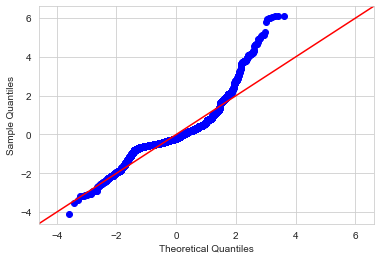

In [475]:
#This was the square root transormation will go with the Box Cox
fig = sm.qqplot(model.resid,line = '45', fit=True)

In [ ]:
X = rug_df.drop(columns=['sale_price'])
y = rug_df['sale_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                       test_size=.2,     
                                       random_state=42)
 
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(y_train)

In [489]:
from scipy.stats import boxcox 
X = rug_df.drop(columns=['sale_price'])
y = rug_df['sale_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                       test_size=.2,     
                                       random_state=42)
 
trns_sale_price, best_lambda = boxcox(y) 

In [492]:
rug_df['trns_sale_price'] = trns_sale_price

In [494]:
#rug_df.drop(columns=['sale_price_sqrt'],inplace=True)

In [495]:
rug_df.head()

sale_price  orig_price  construction  pile_height   area  indoor_outdoor  \
0        29.0        58.0           0.0        0.500   6.51             0.0   
1        99.0       198.0           0.0        0.500  40.00             0.0   
2        89.0       178.0           0.0        0.334  16.00             0.0   
3       109.0       218.0           0.0        0.500  12.00             0.0   
4       189.0       378.0           0.0        0.334  78.30             0.0   

   polypropylene  polyester  cotton  wool  jute  chenille  bamboo  silk  \
0          100.0        0.0     0.0   0.0   0.0       0.0     0.0   0.0   
1          100.0        0.0     0.0   0.0   0.0       0.0     0.0   0.0   
2          100.0        0.0     0.0   0.0   0.0       0.0     0.0   0.0   
3            0.0      100.0     0.0   0.0   0.0       0.0     0.0   0.0   
4           85.0       15.0     0.0   0.0   0.0       0.0     0.0   0.0   

   leather  zakard  acrylic  kork  collection_ariana ziegler  \
0      0.0     0.0      0.0   0.0                          0   
1      0.0     0.0      0.0   0.0                          0   
2      0.0     0.0      0.0   0.0                          0   
3      0.0     0.0      0.0   0.0                          0   
4      0.0     0.0      0.0   0.0                          0   

   collection_balouch  collection_braided jute  collection_cowhide  \
0                   0                        0                   0   
1                   0                        0                   0   
2                   0                        0                   0   
3                   0                        0                   0   
4                   0                        0                   0   

   collection_darya  collection_farahan  collection_hossainabad  \
0                 0                   0                       0   
1                 0                   0                       0   
2                 0                   0                       0   
3                 0                   0                       0   
4                 0                   0                       0   

   collection_hyacinth  collection_jill zarin outdoor rhony alum  \
0                    0                                         0   
1                    0                                         0   
2                    0                                         0   
3                    0                                         0   
4                    0                                         0   

   collection_kashan  collection_kashkuli gabbeh  collection_kazak  \
0                  0                           0                 0   
1                  0                           0                 0   
2                  0                           0                 0   
3                  0                           0                 0   
4                  0                           0                 0   

   collection_kilim modern  collection_lattice  collection_lattice frieze  \
0                        0                   0                          0   
1                        0                   0                          0   
2                        0                   0                          0   
3                        0                   0                          0   
4                        0                   0                          0   

   collection_lattice shag  collection_lola  collection_luna  \
0                        0                0                0   
1                        0                0                0   
2                        0                0                0   
3                        0                0                0   
4                        0                0                0   

   collection_mashad  collection_modern ziegler  collection_monte carlo  \
0                  0                          0                       0   
1                  0                    

In [501]:
X = rug_df.drop(columns=['trns_sale_price'])
y = rug_df['trns_sale_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                       test_size=.2,     
                                       random_state=42)
lm = LinearRegression() 

kf = KFold(n_splits=5, # number of folds
     shuffle=True, # randomizes order of rows before split
     random_state = 42) # using same number in future code/ rerunning allows us to replicate the split 

#to see all validation scores
lm_cv = cross_val_score(lm, X_train, y_train, # estimator, features, target
     cv= kf, # folds created above; could also just use a number 
     scoring='r2') # scoring metric
print(lm_cv)

# to print the mean score with standard deviation, rounded to 2 decimals
print(np.round(np.mean(lm_cv), 2), "+-", np.round(np.std(lm_cv),2))

[0.88741834 0.8907535  0.90151428 0.90672289 0.88971882]
0.9 +- 0.01


In [499]:
X = rug_df.drop(columns=['trns_sale_price'])
y = rug_df['trns_sale_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                       test_size=.2,     
                                       random_state=42)

lr = LinearRegression()
X = X_train
y = y_train
lr.fit(X, y)
lr.score(X,y)
y_actual_train = y
y_predicted_train = lr.predict(X)

print('R^2:', lr.score(X,y))
print('RMSE:', sqrt(mean_squared_error(y_actual_train, y_predicted_train)))
print('MSE:', mean_absolute_error(y_actual_train, y_predicted_train))

R^2: 0.8972325691001115
RMSE: 0.2795328447524849
MSE: 0.2148707656988781


In [500]:
X = rug_df.drop(columns=['trns_sale_price'])
y = rug_df['trns_sale_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                       test_size=.2,     
                                       random_state=42)

lr = LinearRegression()
X = X_test
y = y_test
lr.fit(X, y)
lr.score(X,y)
y_actual_test = y
y_predicted_test = lr.predict(X)

print('R^2:', lr.score(X,y))
print('RMSE:', sqrt(mean_squared_error(y_actual_test, y_predicted_test)))
print('MSE:', mean_absolute_error(y_actual_test, y_predicted_test))

R^2: 0.8978992083456274
RMSE: 0.27978609992977815
MSE: 0.21388048742505195


In [502]:
X = rug_df.drop(columns = ['trns_sale_price'])
X = sm.add_constant(X) 
y = rug_df.trns_sale_price 

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                       test_size=.2,     
                                       random_state=42)

rug_model = sm.OLS(y_train, X_train, data = rug_df) 


results = rug_model.fit()

results.summary()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        trns_sale_price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     958.8
Date:                Tue, 14 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:19:25   Log-Likelihood:                -895.69
No. Observations:                6207   AIC:                             1905.
Df Residuals:                    6150   BIC:                             2289.
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.0046   5.77e-05     80.388      0.000       0.005       0.005
sale_price                                   0.0030   4.34e-05     68.404      0.000       0.003       0.003
orig_price                                  -0.0001   8.84e-06    -15.285      0.000      -0.000      -0.000
construction                                 0.3542      0.017     21.036      0.000       0.321       0.387
pile_height                                  0.0636      0.019      3.439      0.001       0.027       0.100
area                                         0.0077      0.000     50.125      0.000       0.007       0.008
indoor_outdoor                              -0.0014      0.012     -0.114      0.909      -0.025       0.022
polypropylene                                0.0388      0.000     85.617      0.000       0.038       0.040
polyester                                    0.0388      0.000     81.670      0.000       0.038       0.040
cotton                                       0.0387      0.001     70.788      0.000       0.038       0.040
wool                                         0.0389      0.000     85.946      0.000       0.038       0.040
jute                                         0.0390      0.001     65.162      0.000       0.038       0.040
chenille                                     0.0388      0.001     75.687      0.000       0.038       0.040
bamboo                                       0.0395      0.001     41.609      0.000       0.038       0.041
silk                                         0.0378      0.001     52.635      0.000       0.036       0.039
leather                                      0.0383      0.001     68.698      0.000       0.037       0.039
zakard                                       0.0383      0.001     68.698      0.000       0.037       0.039
acrylic                                      0.0384      0.001     40.034      0.000       0.037       0.040
kork                                         0.0390      0.001     26.072      0.000       0.036       0.042
collection_ariana ziegler                    0.3548      0.088      4.038      0.000       0.183       0.527
collection_balouch                           0.3539      0.050      7.079      0.000       0.256       0.452
collection_braided jute                     -0.0771      0.061     -1.265      0.206      -0.196       0.042
collection_cowhide                           0.1415      0.056      2.519      0.012       0.031       0.252
collection_darya                            -0.0012      0.056     -0.021      0.983      -0.111       0.108
collection_farahan                           0.4160      0.079      5.297      0.000       0.262       0.570
collection_hossainabad         

In [503]:
sns.pairplot(rug_df)

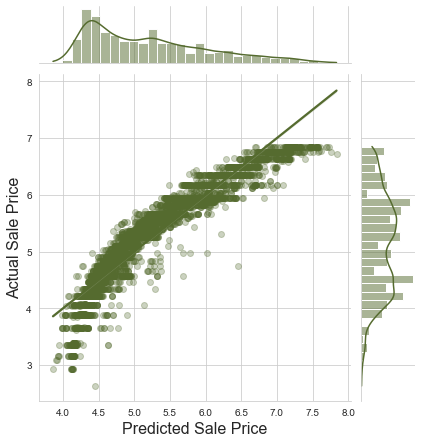

In [504]:
joint_plot = sns.jointplot(x = y_predicted_train,y = y_actual_train , kind='reg',joint_kws = {'scatter_kws':dict(alpha=0.3)}, color='darkolivegreen')
joint_plot.set_axis_labels('Predicted Sale Price', 'Actual Sale Price', fontsize=16)

<AxesSubplot:ylabel='trns_sale_price'>

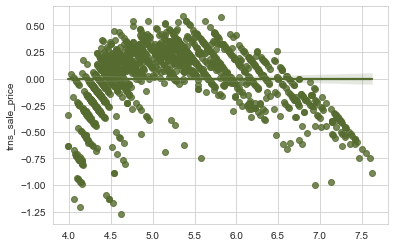

In [510]:
Residual = y_actual_test - y_predicted_test

sns.regplot(x= y_predicted_test, y= Residual,color='darkolivegreen')

# Ridge Regression

In [520]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
## .fit finds the mean and standard deviation of each variable in the training set
std = StandardScaler()
std.fit(X_train.values)


X = rug_df.drop(columns = ['trns_sale_price'])
y = rug_df.trns_sale_price 

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                       test_size=.2,     
                                       random_state=42)

## apply the scaler to the train set
X_tr = std.transform(X_train.values)
## Apply the scaler to the test set
X_te = std.transform(X_test.values)

from sklearn.linear_model import Ridge

lr_model_ridge = Ridge(alpha = 2000)
lr_model_ridge.fit(X_tr, y_train)
ridge_test_r2 = lr_model_ridge.score(X_te, y_test)

print(lr_model_ridge.score(X_tr, y_train))
print(lr_model_ridge.score(X_te, y_test))

list(zip(X_train.columns, lr_model_ridge.coef_))

0.8596069370222468
0.8544380780180655


[('sale_price', 0.3374844745624047),
 ('orig_price', 0.1174279168461931),
 ('construction', 0.14424909735112434),
 ('pile_height', 0.009199619669619666),
 ('area', 0.24841623435615992),
 ('indoor_outdoor', -0.0034656932941490347),
 ('polypropylene', 0.00045603011557838124),
 ('polyester', -0.000732561888418728),
 ('cotton', 0.0009666809892312462),
 ('wool', 0.0011720816722416865),
 ('jute', -0.0017452678234446796),
 ('chenille', 0.0011725669737853686),
 ('bamboo', 0.00042596516713981375),
 ('silk', -0.004233230209024738),
 ('leather', -0.0037271565344185235),
 ('zakard', -0.0037271565344185196),
 ('acrylic', -0.0008713210448743405),
 ('kork', -0.0016474398835697238),
 ('collection_ariana ziegler', 0.005453539371657882),
 ('collection_balouch', 0.031488538982739546),
 ('collection_braided jute', -0.013164017088363237),
 ('collection_cowhide', 0.027520864824254677),
 ('collection_darya', 0.03514411904994279),
 ('collection_farahan', 0.006555159144022841),
 ('collection_hossainabad', 0.00

In [521]:

alphas = 10**np.linspace(-2,2,200)
ridge_model = RidgeCV(alphas = alphas, cv=5)
ridge_model.fit(X_tr, y_train)
ridge_model.score(X_tr, y_train)
r_squared_test = ridge_model.score(X_te, y_test)
list(zip(X_train.columns, lr_model_ridge.coef_))
alpha = ridge_model.alpha_

In [522]:
r_squared_test

0.8945391596804384

# Lasso Regression

In [527]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

std = StandardScaler()
std.fit(X_train.values)

X_tr = std.transform(X_train.values)

X_te = std.transform(X_test.values)
lasso = Lasso(alpha = .01)
lasso.fit(X_tr, y_train)
test_r_squared = lasso.score(X_te, y_test)
print(test_r_squared)
print(list(zip(X_train.columns, lasso.coef_)))

0.8889269657506658
[('sale_price', 0.6174667483911704), ('orig_price', -0.02134424327382635), ('construction', 0.16228900471754282), ('pile_height', -0.0), ('area', 0.24128986326782983), ('indoor_outdoor', -0.0), ('polypropylene', -0.0), ('polyester', -0.0), ('cotton', 0.0), ('wool', 0.0), ('jute', -0.0), ('chenille', -0.0), ('bamboo', 0.0), ('silk', -0.0), ('leather', -0.0), ('zakard', -0.0), ('acrylic', -0.0), ('kork', -0.0), ('collection_ariana ziegler', 0.0), ('collection_balouch', 0.029046941821116407), ('collection_braided jute', -0.007468655748360166), ('collection_cowhide', 0.0), ('collection_darya', -0.0014124298883772595), ('collection_farahan', 0.0), ('collection_hossainabad', 0.001670553791302094), ('collection_hyacinth', 0.0), ('collection_jill zarin outdoor rhony alum', -0.0), ('collection_kashan', -0.015296568477114305), ('collection_kashkuli gabbeh', 0.0051701939074547424), ('collection_kazak', 0.012254375471784155), ('collection_kilim modern', -0.0), ('collection_latti

In [524]:
alphas = 10**np.linspace(-2,2,200)
lasso_model = LassoCV(alphas = alphas, cv=5)
lasso_model.fit(X_tr, y_train)
r_squared_train = lasso_model.score(X_tr, y_train)
r_squared_test = lasso_model.score(X_te, y_test)
alpha = lasso_model.alpha_

In [526]:
print(r_squared_train)
print(r_squared_test)
print(alpha)

0.8904034893237677
0.8889269657506658
0.01


# Use Liner Model

In [529]:
X = rug_df.drop(columns=['trns_sale_price','pile_height','indoor_outdoor'])
y = rug_df['trns_sale_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                       test_size=.2,     
                                       random_state=42)
lm = LinearRegression() 

kf = KFold(n_splits=5, # number of folds
     shuffle=True, # randomizes order of rows before split
     random_state = 42) # using same number in future code/ rerunning allows us to replicate the split 

#to see all validation scores
lm_cv = cross_val_score(lm, X_train, y_train, # estimator, features, target
     cv= kf, # folds created above; could also just use a number 
     scoring='r2') # scoring metric
print(lm_cv)

# to print the mean score with standard deviation, rounded to 2 decimals
print(np.round(np.mean(lm_cv), 2), "+-", np.round(np.std(lm_cv),2))

[0.8872318  0.89066541 0.90146837 0.90648066 0.88937052]
0.9 +- 0.01


In [531]:
X = rug_df.drop(columns=['trns_sale_price','pile_height','indoor_outdoor'])
y = rug_df['trns_sale_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                       test_size=.2,     
                                       random_state=42)

lr = LinearRegression()
X = X_train
y = y_train
lr.fit(X, y)
lr.score(X,y)
y_actual_train = y
y_predicted_train = lr.predict(X)

print('R^2:', lr.score(X,y))
print('RMSE:', sqrt(mean_squared_error(y_actual_train, y_predicted_train)))
print('MSE:', mean_absolute_error(y_actual_train, y_predicted_train))

R^2: 0.8970347819441481
RMSE: 0.2798017112089747
MSE: 0.21508837924059893


In [532]:
X = rug_df.drop(columns=['trns_sale_price'])
y = rug_df['trns_sale_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                       test_size=.2,     
                                       random_state=42)

lr = LinearRegression()
X = X_test
y = y_test
lr.fit(X, y)
lr.score(X,y)
y_actual_test = y
y_predicted_test = lr.predict(X)

print('R^2:', lr.score(X,y))
print('RMSE:', sqrt(mean_squared_error(y_actual_test, y_predicted_test)))
print('MSE:', mean_absolute_error(y_actual_test, y_predicted_test))

R^2: 0.8978992083456274
RMSE: 0.27978609992977815
MSE: 0.21388048742505195


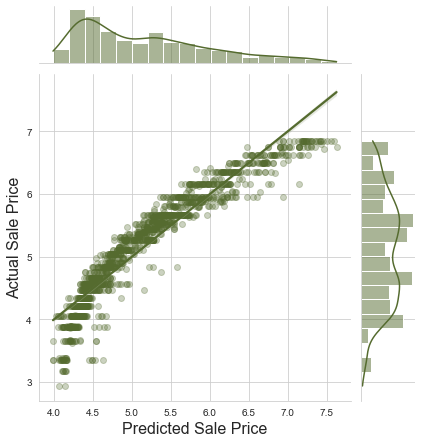

In [534]:
joint_plot = sns.jointplot(x = y_predicted_test,y = y_actual_test , kind='reg',joint_kws = {'scatter_kws':dict(alpha=0.3)}, color='darkolivegreen')
joint_plot.set_axis_labels('Predicted Sale Price', 'Actual Sale Price', fontsize=16)

In [536]:
rug_df.head()

sale_price  orig_price  construction  pile_height   area  indoor_outdoor  \
0        29.0        58.0           0.0        0.500   6.51             0.0   
1        99.0       198.0           0.0        0.500  40.00             0.0   
2        89.0       178.0           0.0        0.334  16.00             0.0   
3       109.0       218.0           0.0        0.500  12.00             0.0   
4       189.0       378.0           0.0        0.334  78.30             0.0   

   polypropylene  polyester  cotton  wool  jute  chenille  bamboo  silk  \
0          100.0        0.0     0.0   0.0   0.0       0.0     0.0   0.0   
1          100.0        0.0     0.0   0.0   0.0       0.0     0.0   0.0   
2          100.0        0.0     0.0   0.0   0.0       0.0     0.0   0.0   
3            0.0      100.0     0.0   0.0   0.0       0.0     0.0   0.0   
4           85.0       15.0     0.0   0.0   0.0       0.0     0.0   0.0   

   leather  zakard  acrylic  kork  collection_ariana ziegler  \
0      0.0     0.0      0.0   0.0                          0   
1      0.0     0.0      0.0   0.0                          0   
2      0.0     0.0      0.0   0.0                          0   
3      0.0     0.0      0.0   0.0                          0   
4      0.0     0.0      0.0   0.0                          0   

   collection_balouch  collection_braided jute  collection_cowhide  \
0                   0                        0                   0   
1                   0                        0                   0   
2                   0                        0                   0   
3                   0                        0                   0   
4                   0                        0                   0   

   collection_darya  collection_farahan  collection_hossainabad  \
0                 0                   0                       0   
1                 0                   0                       0   
2                 0                   0                       0   
3                 0                   0                       0   
4                 0                   0                       0   

   collection_hyacinth  collection_jill zarin outdoor rhony alum  \
0                    0                                         0   
1                    0                                         0   
2                    0                                         0   
3                    0                                         0   
4                    0                                         0   

   collection_kashan  collection_kashkuli gabbeh  collection_kazak  \
0                  0                           0                 0   
1                  0                           0                 0   
2                  0                           0                 0   
3                  0                           0                 0   
4                  0                           0                 0   

   collection_kilim modern  collection_lattice  collection_lattice frieze  \
0                        0                   0                          0   
1                        0                   0                          0   
2                        0                   0                          0   
3                        0                   0                          0   
4                        0                   0                          0   

   collection_lattice shag  collection_lola  collection_luna  \
0                        0                0                0   
1                        0                0                0   
2                        0                0                0   
3                        0                0                0   
4                        0                0                0   

   collection_mashad  collection_modern ziegler  collection_monte carlo  \
0                  0                          0                       0   
1                  0                    

In [543]:
X = rug_df.drop(columns=['trns_sale_price','pile_height','indoor_outdoor'])
X = sm.add_constant(X)
y = rug_df['trns_sale_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                       test_size=.2,     
                                       random_state=42)

rug_model = sm.OLS(y_train, X_train, data = rug_df) 


results = rug_model.fit()

results.summary()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        trns_sale_price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     992.5
Date:                Tue, 14 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:52:11   Log-Likelihood:                -901.66
No. Observations:                6207   AIC:                             1913.
Df Residuals:                    6152   BIC:                             2284.
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.0047   5.67e-05     82.566      0.000       0.005       0.005
sale_price                                   0.0030   4.34e-05     68.418      0.000       0.003       0.003
orig_price                                  -0.0001   8.84e-06    -15.232      0.000      -0.000      -0.000
construction                                 0.3499      0.017     20.834      0.000       0.317       0.383
area                                         0.0076      0.000     50.042      0.000       0.007       0.008
polypropylene                                0.0391      0.000     88.102      0.000       0.038       0.040
polyester                                    0.0391      0.000     83.953      0.000       0.038       0.040
cotton                                       0.0390      0.001     72.334      0.000       0.038       0.040
wool                                         0.0392      0.000     88.432      0.000       0.038       0.040
jute                                         0.0393      0.001     66.487      0.000       0.038       0.040
chenille                                     0.0392      0.001     77.531      0.000       0.038       0.040
bamboo                                       0.0398      0.001     42.076      0.000       0.038       0.042
silk                                         0.0382      0.001     53.739      0.000       0.037       0.040
leather                                      0.0386      0.001     70.129      0.000       0.037       0.040
zakard                                       0.0386      0.001     70.129      0.000       0.037       0.040
acrylic                                      0.0387      0.001     40.424      0.000       0.037       0.041
kork                                         0.0394      0.001     26.378      0.000       0.036       0.042
collection_ariana ziegler                    0.3456      0.088      3.932      0.000       0.173       0.518
collection_balouch                           0.3470      0.050      6.941      0.000       0.249       0.445
collection_braided jute                     -0.0823      0.061     -1.351      0.177      -0.202       0.037
collection_cowhide                           0.1234      0.056      2.205      0.028       0.014       0.233
collection_darya                             0.0169      0.056      0.302      0.762      -0.092       0.126
collection_farahan                           0.4188      0.079      5.329      0.000       0.265       0.573
collection_hossainabad                       0.4234      0.063      6.691      0.000       0.299       0.547
collection_hyacinth                          0.1925      0.060      3.229      0.001       0.076       0.309
collection_jill zarin outdoor r

In [544]:
X = rug_df.drop(columns=['trns_sale_price','pile_height','indoor_outdoor'])
X = sm.add_constant(X)
y = rug_df['trns_sale_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                       test_size=.2,     
                                       random_state=42)

rug_model = sm.OLS(y_test, X_test, data = rug_df) 


results = rug_model.fit()

results.summary()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        trns_sale_price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     242.5
Date:                Tue, 14 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:52:54   Log-Likelihood:                -228.98
No. Observations:                1552   AIC:                             568.0
Df Residuals:                    1497   BIC:                             862.1
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.0046   9.29e-05     49.058      0.000       0.004       0.005
sale_price                                   0.0030   8.95e-05     33.046      0.000       0.003       0.003
orig_price                                  -0.0001   1.75e-05     -6.836      0.000      -0.000   -8.53e-05
construction                                 0.3499      0.034     10.184      0.000       0.282       0.417
area                                         0.0081      0.000     24.373      0.000       0.007       0.009
polypropylene                                0.0385      0.001     53.008      0.000       0.037       0.040
polyester                                    0.0387      0.001     48.889      0.000       0.037       0.040
cotton                                       0.0378      0.001     36.919      0.000       0.036       0.040
wool                                         0.0381      0.001     52.586      0.000       0.037       0.040
jute                                         0.0376      0.001     36.830      0.000       0.036       0.040
chenille                                     0.0375      0.001     41.577      0.000       0.036       0.039
bamboo                                       0.0380      0.002     23.454      0.000       0.035       0.041
silk                                         0.0388      0.001     32.338      0.000       0.036       0.041
leather                                      0.0382      0.001     35.340      0.000       0.036       0.040
zakard                                       0.0382      0.001     35.340      0.000       0.036       0.040
acrylic                                      0.0378      0.002     22.806      0.000       0.035       0.041
kork                                         0.0364      0.002     19.770      0.000       0.033       0.040
collection_ariana ziegler                    0.1290      0.221      0.584      0.559      -0.304       0.562
collection_balouch                           0.4232      0.084      5.009      0.000       0.258       0.589
collection_braided jute                      0.1211      0.105      1.150      0.250      -0.086       0.328
collection_cowhide                           0.1942      0.114      1.698      0.090      -0.030       0.419
collection_darya                             0.0831      0.097      0.858      0.391      -0.107       0.273
collection_farahan                           0.5329      0.164      3.259      0.001       0.212       0.854
collection_hossainabad                       0.4607      0.105      4.383      0.000       0.255       0.667
collection_hyacinth                          0.2051      0.095      2.155      0.031       0.018       0.392
collection_jill zarin outdoor r

In [553]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = rug_df.drop(columns=['trns_sale_price','pile_height','indoor_outdoor'])
X = sm.add_constant(X)
y = rug_df['trns_sale_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                       test_size=.2,     
                                       random_state=42)

rug_model = sm.OLS(y_train, X_train, data = rug_df) 

vif = pd.DataFrame()
vif['variables'] = X.columns
vif['vif'] =[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


variables        vif
0                                      const   0.000000
1                                 sale_price   8.151298
2                                 orig_price   6.350318
3                               construction   4.700221
4                                       area   2.001028
5                              polypropylene        inf
6                                  polyester        inf
7                                     cotton        inf
8                                       wool        inf
9                                       jute        inf
10                                  chenille        inf
11                                    bamboo        inf
12                                      silk        inf
13                                   leather        inf
14                                    zakard        inf
15                                   acrylic        inf
16                                      kork        inf
17                 collection_ariana ziegler   1.387413
18                        collection_balouch   6.674582
19                   collection_braided jute   2.175690
20                        collection_cowhide   2.965959
21                          collection_darya   4.005071
22                        collection_farahan   1.488468
23                    collection_hossainabad   2.264969
24                       collection_hyacinth   2.215390
25  collection_jill zarin outdoor rhony alum   2.875945
26                         collection_kashan   1.211351
27                collection_kashkuli gabbeh   3.038544
28                          collection_kazak   5.339542
29                   collection_kilim modern   2.130156
30                        collection_lattice   1.919782
31                 collection_lattice frieze   2.569280
32                   collection_lattice shag   2.500989
33                           collection_lola   2.109955
34                           collection_luna   2.006350
35                         collection_mashad   1.594981
36                 collection_modern ziegler   3.156288
37                    collection_monte carlo   2.450068
38                       collection_moroccan   6.413197
39               collection_moroccan trellis   2.278370
40                          collection_nepal   2.552775
41                         collection_oregon   2.056752
42                          collection_other  34.364496
43                         collection_oushak   1.116316
44              collection_outdoor botanical   2.194686
45                collection_outdoor coastal   2.285151
46                collection_outdoor lattice   3.369681
47                 collection_outdoor modern   2.297412
48                        collection_paragon   2.006161
49               collection_peshawar ziegler   2.386123
50                       collection_santiago   2.246746
51                         collection_saturn   2.109062
52                     collection_solid shag   2.640124
53                          collection_sumak   2.225968
54                       collection_timeless   2.730950
55                  collection_ultra vintage   5.247251
56                         collection_uptown   2.147088

In [554]:
X = rug_df.drop(columns=['trns_sale_price','pile_height','indoor_outdoor','orig_price'])
X = sm.add_constant(X)
y = rug_df['trns_sale_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                       test_size=.2,     
                                       random_state=42)

rug_model = sm.OLS(y_test, X_test, data = rug_df) 


results = rug_model.fit()

vif = pd.DataFrame()
vif['variables'] = X.columns
vif['vif'] =[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


variables        vif
0                                      const   0.000000
1                                 sale_price   4.325287
2                               construction   4.638828
3                                       area   1.949710
4                              polypropylene        inf
5                                  polyester        inf
6                                     cotton        inf
7                                       wool        inf
8                                       jute        inf
9                                   chenille        inf
10                                    bamboo        inf
11                                      silk        inf
12                                   leather        inf
13                                    zakard        inf
14                                   acrylic        inf
15                                      kork        inf
16                 collection_ariana ziegler   1.361645
17                        collection_balouch   6.654377
18                   collection_braided jute   2.171532
19                        collection_cowhide   2.919794
20                          collection_darya   3.947194
21                        collection_farahan   1.471993
22                    collection_hossainabad   2.212153
23                       collection_hyacinth   2.215146
24  collection_jill zarin outdoor rhony alum   2.875911
25                         collection_kashan   1.149361
26                collection_kashkuli gabbeh   3.038072
27                          collection_kazak   5.333098
28                   collection_kilim modern   2.093915
29                        collection_lattice   1.919781
30                 collection_lattice frieze   2.569253
31                   collection_lattice shag   2.500863
32                           collection_lola   2.109921
33                           collection_luna   1.999023
34                         collection_mashad   1.431709
35                 collection_modern ziegler   3.117095
36                    collection_monte carlo   2.450024
37                       collection_moroccan   6.405768
38               collection_moroccan trellis   2.278337
39                          collection_nepal   2.542613
40                         collection_oregon   2.056686
41                          collection_other  34.361221
42                         collection_oushak   1.116113
43              collection_outdoor botanical   2.194607
44                collection_outdoor coastal   2.284699
45                collection_outdoor lattice   3.369478
46                 collection_outdoor modern   2.297266
47                        collection_paragon   2.006132
48               collection_peshawar ziegler   2.385046
49                       collection_santiago   2.246736
50                         collection_saturn   2.109002
51                     collection_solid shag   2.640092
52                          collection_sumak   2.225251
53                       collection_timeless   2.730582
54                  collection_ultra vintage   5.119333
55                         collection_uptown   2.146633

In [559]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        trns_sale_price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     238.9
Date:                Tue, 14 Jun 2022   Prob (F-statistic):               0.00
Time:                        21:14:46   Log-Likelihood:                -252.83
No. Observations:                1552   AIC:                             613.7
Df Residuals:                    1498   BIC:                             902.4
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.0046   9.43e-05     48.358      0.000       0.004       0.005
sale_price                                   0.0025   6.68e-05     38.047      0.000       0.002       0.003
construction                                 0.3119      0.034      9.062      0.000       0.244       0.379
area                                         0.0084      0.000     25.266      0.000       0.008       0.009
polypropylene                                0.0386      0.001     52.333      0.000       0.037       0.040
polyester                                    0.0388      0.001     48.344      0.000       0.037       0.040
cotton                                       0.0376      0.001     36.170      0.000       0.036       0.040
wool                                         0.0382      0.001     51.898      0.000       0.037       0.040
jute                                         0.0379      0.001     36.580      0.000       0.036       0.040
chenille                                     0.0376      0.001     41.125      0.000       0.036       0.039
bamboo                                       0.0379      0.002     23.066      0.000       0.035       0.041
silk                                         0.0387      0.001     31.774      0.000       0.036       0.041
leather                                      0.0384      0.001     34.941      0.000       0.036       0.041
zakard                                       0.0384      0.001     34.941      0.000       0.036       0.041
acrylic                                      0.0377      0.002     22.393      0.000       0.034       0.041
kork                                         0.0362      0.002     19.390      0.000       0.033       0.040
collection_ariana ziegler                   -0.0520      0.223     -0.233      0.815      -0.489       0.385
collection_balouch                           0.4745      0.085      5.554      0.000       0.307       0.642
collection_braided jute                      0.1607      0.107      1.505      0.132      -0.049       0.370
collection_cowhide                           0.3041      0.115      2.645      0.008       0.079       0.530
collection_darya                             0.1735      0.097      1.782      0.075      -0.017       0.364
collection_farahan                           0.4098      0.165      2.484      0.013       0.086       0.733
collection_hossainabad                       0.3482      0.105      3.304      0.001       0.142       0.555
collection_hyacinth                          0.2124      0.097      2.199      0.028       0.023       0.402
collection_jill zarin outdoor rhony alum     0.1009      0.098      1.025      0.306      -0.092       0.294
collection_kashan              

In [562]:
r_squared = results.rsquared

In [563]:
r_squared

0.8942206578927168

In [539]:
rug_df.columns

Index(['sale_price', 'orig_price', 'construction', 'pile_height', 'area',
       'indoor_outdoor', 'polypropylene', 'polyester', 'cotton', 'wool',
       'jute', 'chenille', 'bamboo', 'silk', 'leather', 'zakard', 'acrylic',
       'kork', 'collection_ariana ziegler', 'collection_balouch',
       'collection_braided jute', 'collection_cowhide', 'collection_darya',
       'collection_farahan', 'collection_hossainabad', 'collection_hyacinth',
       'collection_jill zarin outdoor rhony alum', 'collection_kashan',
       'collection_kashkuli gabbeh', 'collection_kazak',
       'collection_kilim modern', 'collection_lattice',
       'collection_lattice frieze', 'collection_lattice shag',
       'collection_lola', 'collection_luna', 'collection_mashad',
       'collection_modern ziegler', 'collection_monte carlo',
       'collection_moroccan', 'collection_moroccan trellis',
       'collection_nepal', 'collection_oregon', 'collection_other',
       'collection_oushak', 'collection_outdoor bot

In [541]:
X = rug_df.drop(columns=['trns_sale_price','pile_height','indoor_outdoor','collection_ariana ziegler',
                         'collection_balouch','collection_braided jute', 'collection_cowhide', 'collection_darya',
                         'collection_farahan', 'collection_hossainabad', 'collection_hyacinth',
                         'collection_jill zarin outdoor rhony alum', 'collection_kashan','collection_kashkuli gabbeh',
                         'collection_kazak','collection_kilim modern', 'collection_lattice','collection_lattice frieze',
                         'collection_lattice shag','collection_lola', 'collection_luna', 'collection_mashad',
                         'collection_modern ziegler', 'collection_monte carlo','collection_moroccan',
                         'collection_moroccan trellis','collection_nepal', 'collection_oregon', 'collection_other',
                         'collection_oushak', 'collection_outdoor botanical','collection_outdoor coastal',
                         'collection_outdoor lattice','collection_outdoor modern', 'collection_paragon',
                         'collection_peshawar ziegler', 'collection_santiago','collection_saturn',
                         'collection_solid shag', 'collection_sumak','collection_timeless', 'collection_ultra vintage',
                         'collection_uptown','construction'])
y = rug_df['trns_sale_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                       test_size=.2,     
                                       random_state=42)

rug_model = sm.OLS(y_train, X_train, data = rug_df) 


results = rug_model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        trns_sale_price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     3037.
Date:                Tue, 14 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:46:36   Log-Likelihood:                -1755.6
No. Observations:                6207   AIC:                             3539.
Df Residuals:                    6193   BIC:                             3634.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
sale_price        0.0035   3.47e-05    100.831      0.000       0.003       0.004
orig_price    -8.634e-05   7.62e-06    -11.325      0.000      -0.000   -7.14e-05
area              0.0047      0.000     35.630      0.000       0.004       0.005
polypropylene     0.0410   8.84e-05    464.353      0.000       0.041       0.041
polyester         0.0412      0.000    238.394      0.000       0.041       0.042
cotton            0.0412      0.000    115.988      0.000       0.041       0.042
wool              0.0413   9.02e-05    457.641      0.000       0.041       0.041
jute              0.0411      0.000     89.156      0.000       0.040       0.042
chenille          0.0410      0.000    136.644      0.000       0.040       0.042
bamboo            0.0414      0.001     43.440      0.000       0.040       0.043
silk              0.0402      0.001     61.859      0.000       0.039       0.041
leather           0.0405      0.000    107.318      0.000       0.040       0.041
zakard            0.0405      0.000    107.318      0.000       0.040       0.041
acrylic           0.0407      0.001     41.913      0.000       0.039       0.043
kork              0.0409      0.002     25.171      0.000       0.038       0.044
==============================================================================
Omnibus:                      554.058   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              722.353
Skew:                          -0.772   Prob(JB):                    1.39e-157
Kurtosis:                       3.637   Cond. No.                     5.26e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.94e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Adjusted R^2 goes down when removing collection information

In [565]:
X = rug_df.drop(columns=['trns_sale_price','pile_height','indoor_outdoor','orig_price'])
X = sm.add_constant(X)
y = rug_df['trns_sale_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                       test_size=.2,     
                                       random_state=42)
lm = LinearRegression() 

kf = KFold(n_splits=5, # number of folds
     shuffle=True, # randomizes order of rows before split
     random_state = 42) # using same number in future code/ rerunning allows us to replicate the split 

#to see all validation scores
lm_cv = cross_val_score(lm, X_test, y_test, # estimator, features, target
     cv= kf, # folds created above; could also just use a number 
     scoring='r2') # scoring metric
print(lm_cv)

# to print the mean score with standard deviation, rounded to 2 decimals
print(np.round(np.mean(lm_cv), 2), "+-", np.round(np.std(lm_cv),2))

[0.88546549 0.8751636  0.8777516  0.88868991 0.8958439 ]
0.88 +- 0.01


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [566]:
lr = LinearRegression()
X = X_test
y = y_test
lr.fit(X, y)
lr.score(X,y)

0.8942206578927168

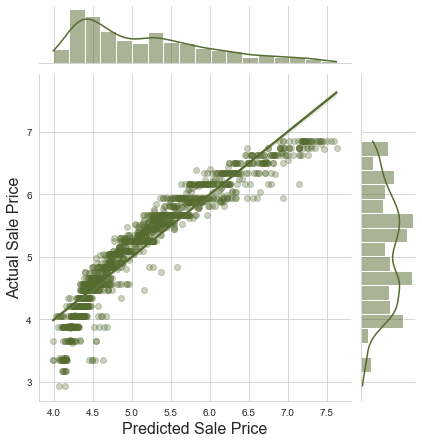

In [568]:
joint_plot = sns.jointplot(x = y_predicted_test,y = y_actual_test , kind='reg',joint_kws = {'scatter_kws':dict(alpha=0.3)}, color='darkolivegreen')
joint_plot.set_axis_labels('Predicted Sale Price', 'Actual Sale Price', fontsize=16)